# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [32]:
#  1. Get the total rides for each city type

rural_df = pyber_data_df[pyber_data_df['type']=='Rural']
suburban_df = pyber_data_df[pyber_data_df['type']=='Suburban']
urban_df = pyber_data_df[pyber_data_df['type']=='Urban']

rural_count = rural_df.groupby('type').count()['ride_id']
suburban_count = suburban_df.groupby('type').count()['ride_id']
urban_count = urban_df.groupby('type').count()['ride_id']
# print(rural_count, suburban_count, urban_count)

rural_count = rural_count[0]
suburban_count = suburban_count[0]
urban_count = urban_count[0]
# print(rural_count, suburban_count, urban_count)


# rural_count = pyber_data_df.groupby('type').count().loc['Rural','ride_id']
# suburban_count = pyber_data_df.groupby('type').count().loc['Suburban','ride_id']
# urban_count = pyber_data_df.groupby('type').count().loc['Urban','ride_id']
# print(rural_count, suburban_count, urban_count)

In [33]:
# 2. Get the total drivers for each city type

rural_drivers = rural_df.groupby('city').mean()['driver_count'].sum()
suburban_drivers = suburban_df.groupby('city').mean()['driver_count'].sum()
urban_drivers = urban_df.groupby('city').mean()['driver_count'].sum()
print(rural_drivers, suburban_drivers, urban_drivers)
# pyber_data_df.groupby('city').mean()
# rural_drivers = pyber_data_df.groupby('city').mean().loc['Rural','driver_count']
# suburban_drivers = pyber_data_df.groupby('city').mean().loc['Suburban','driver_count']
# urban_drivers = pyber_data_df.groupby('city').mean().loc['Urban','driver_count']
# pyber_data_df.groupby('city').mean()['driver_count']

78.0 490.0 2405.0


In [34]:
#  3. Get the total amount of fares for each city type
rural_fares = pyber_data_df.groupby('type').sum().loc['Rural','fare']
suburban_fares = pyber_data_df.groupby('type').sum().loc['Suburban','fare']
urban_fares = pyber_data_df.groupby('type').sum().loc['Urban','fare']

In [35]:
#  4. Get the average fare per ride for each city type. 
rural_per_ride = rural_fares / rural_count
suburban_per_ride = suburban_fares / suburban_count
urban_per_ride = urban_fares / urban_count


In [36]:
# 5. Get the average fare per driver for each city type. 
rural_per_driver = rural_fares / rural_drivers
suburban_per_driver = suburban_fares / suburban_drivers
urban_per_driver = urban_fares / urban_drivers

In [37]:
#  6. Create a PyBer summary DataFrame. 



pyber_summary_df = pd.DataFrame({
    "Total Rides" : pd.Series([rural_count, suburban_count, urban_count]),
    "Total Drivers" : pd.Series([rural_drivers, suburban_drivers, urban_drivers]),
    "Total Fares" : pd.Series([rural_fares, suburban_fares, urban_fares]),
    "Average Fare per Ride" : pd.Series([rural_per_ride, suburban_per_ride, urban_per_ride]),
    "Average Fare per Driver" : pd.Series([rural_per_driver, suburban_per_driver, urban_per_driver])
})

pyber_summary_df = pyber_summary_df.rename(index={0:'Rural', 1: 'Suburban', 2:'Urban'})

pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78.0,4327.93,34.623440,55.486282
Suburban,625,490.0,19356.33,30.970128,39.502714
Urban,1625,2405.0,39854.38,24.525772,16.571468


In [38]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78.0,4327.93,34.623440,55.486282
Suburban,625,490.0,19356.33,30.970128,39.502714
Urban,1625,2405.0,39854.38,24.525772,16.571468


In [39]:
#  8. Format the columns.
pyber_summary_df['Total Drivers'] = pyber_summary_df['Total Drivers'].map("{:,.0f}".format)
pyber_summary_df['Total Rides'] = pyber_summary_df['Total Rides'].map("{:,}".format)
pyber_summary_df['Total Fares'] = pyber_summary_df['Total Fares'].map("${:,}".format)
pyber_summary_df['Average Fare per Ride'] = pyber_summary_df['Average Fare per Ride'].map("${:.2f}".format)
pyber_summary_df['Average Fare per Driver'] = pyber_summary_df['Average Fare per Driver'].map("${:.2f}".format)

In [11]:
pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [40]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [41]:
grouped = pyber_data_df.groupby(['type','date'])

In [42]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
new_df = grouped['fare'].sum()
new_df

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:49    18.45
       2019-05-08 07:29:01    18.55
       2019-05-08 11:38:35    19.77
       2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64

In [43]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
new_df = new_df.reset_index()
new_df

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [44]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pivot_table = new_df.pivot(index='date',columns='type', values='fare')
pivot_table.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [45]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

jan_thru_april = pivot_table.loc['2019-01-01':'2019-04-29']
jan_thru_april.head(10)


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [46]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
jan_thru_april.index = pd.to_datetime(jan_thru_april.index)


In [47]:
# 7. Check that the datatype for the index is datetime using df.info()
jan_thru_april.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [48]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
resampled_df = jan_thru_april.resample('W').sum()
resampled_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


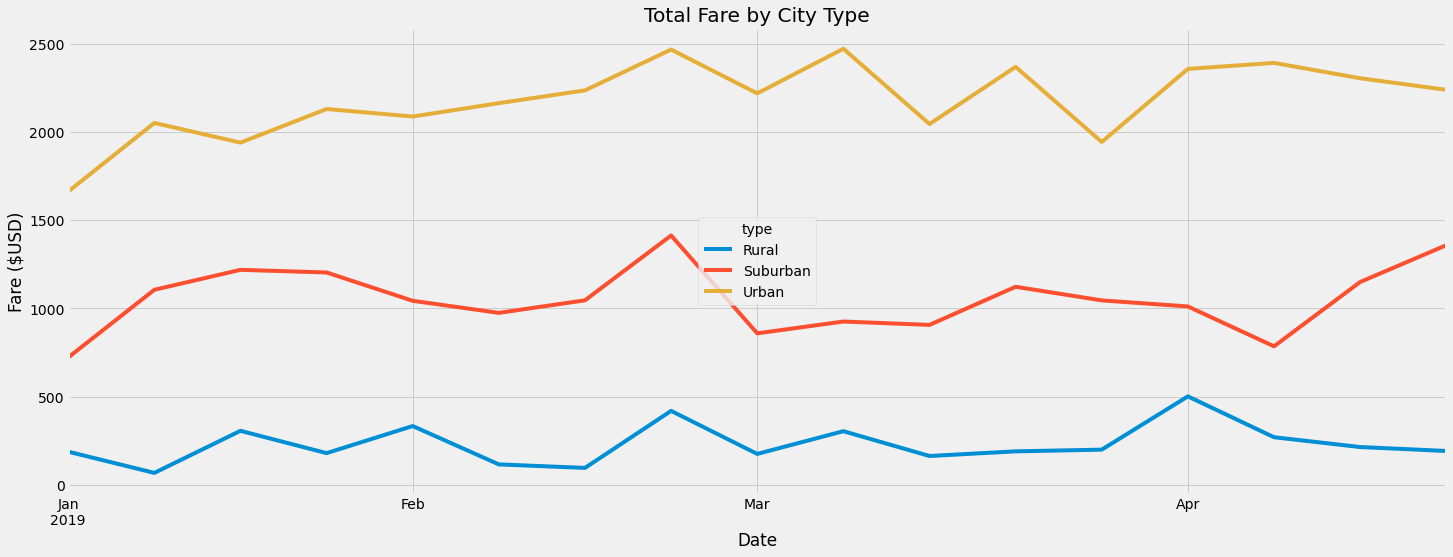

In [50]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
fig, ax = plt.subplots()
resampled_df.plot(ax=ax,
                 figsize=(22,8))
ax.set_ylabel('Fare ($USD)')
ax.set_xlabel('Date')
ax.set_title("Total Fare by City Type")
ax.legend(title='type', loc='center')


# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

plt.savefig("analysis/total_fare_by_city_type.png")

